This module contains the definition of the CompressorAirfoil class, which is designed to generate axial compressor airfoil geometry.

# 1. Import CompressorAirfoil class and the required libraries

In [1]:
from BladeGenClass import CompressorAirfoil
import numpy as np
import matplotlib.pyplot as plt

# 2. Set input parameters

## 2.1 Set required parameters such as:
1. Inlet matal angle ($\kappa_1$) ($degree$)
2. Outlet metal angle ($\kappa_2$) ($degree$)
3. Chord length (c) ($mm$)
4. Stagger Angle ($\gamma$) ($degree$)
5. Leading Edge Wedge Angle ($\lambda_{L.E.}$) ($degree$)
6. Trailing Edge Wedge Angle ($\lambda_{T.E.}$) ($degree$)
7. Maximun Thickness ($t_{max}$) ($\%  \text{ chord length}$)
8. Location of Maximum Thickness ($Loc_{t_{max}}$) ($\%  \text{ chord length}$)
9. Leading Edge Thickness ($L.E._{thick}$) ($\%  \text{ chord length}$)
10. Trailing Edge Thickness ($T.E._{thick}$) ($\%  \text{ chord length}$)
11. Leading Edge Ellipse Ratio ($ER_{L.E.}$) 
12. Trailing Edge Ellipse Ratio ($ER_{T.E.}$)( ER=1: circle)
13. x-coordinates of suction side control points 
14. y-coordinates of suction side control points
15. x-coordinate of Leading Edge ($x_0$)
16. y-coordinate of Leading Edge ($y_0$)


In [2]:
kappa1 = 45 # inlet metal angle in degree
kappa2 = 20 # outlet metal angle in degree
stagger = 31.68743849 # stagger angle in degree
wedge_angle_LE = 16.0 # Leading Edge Wedge Angle in degree 
wedge_angle_TE = 8.0 # Trainling Edge Wedge Angle in degree
chord = 75 # Chord length (form L.E. to T.E.)
tmax = 10  # Maximum Thickness in percent of chord
tmax_loc = 35  # Location of maximum thickness in percent of chord
x0 = 0  # x-Coordination of L.E.
y0 = 0  # y-Coordination of T.E.
x1 = x0 + chord * np.cos(np.deg2rad(stagger)) # x-coordinate of chord end point
y1 = y0 + chord * np.sin(np.deg2rad(stagger)) # y-coordinate of chord end point
LE_th = 2.5  # Leadding Edge thickness in percent of chord
TE_th = 1.5  # Trailing Edge thickness in percent of chord
er_LE = 3 # Ellipse ratio of Leading Edge
er_TE = 1 # Ellipse ratio of Trailing Edge (er = 1 is a circle)

LE_thickness = LE_th * chord / 100 # the actual value of Leading Edge Thickness
TE_thickness = TE_th * chord / 100 # the actual value of Trailing Edge Thickness
x_s_sp = np.array([9.29, 41.7]) # x-coordinate of control points condering Leading Edge position
y_s_sp = np.array([12.92,32.93]) # y-coordinate of suction side spline control points condering Leading Edge position

## 2.2 Initialize the CompressorAirfoil class with input parameters

In [3]:
blade_1 = CompressorAirfoil(
    kappa1=kappa1,
    kappa2=kappa2,
    chord=chord,
    stagger=stagger,
    wedge_angle_LE=wedge_angle_LE,
    wedge_angle_TE=wedge_angle_TE,
    tmax=tmax,
    tmax_loc=tmax_loc,
    LE_th=LE_th,
    TE_th=TE_th,
    er_LE=er_LE,
    er_TE=er_TE,
    x_s_sp=x_s_sp,
    y_s_sp=y_s_sp,
    x0=x0,
    y0=y0)

# 3. Create Suction Side and Pressure Side

In [4]:
blade_1.BladeGen()
suction_side_changes = blade_1.suction_sign_change
pressure_side_changes = blade_1.pressure_sign_change

# 4. Plot Suction Side and Pressure Side and their Control Points

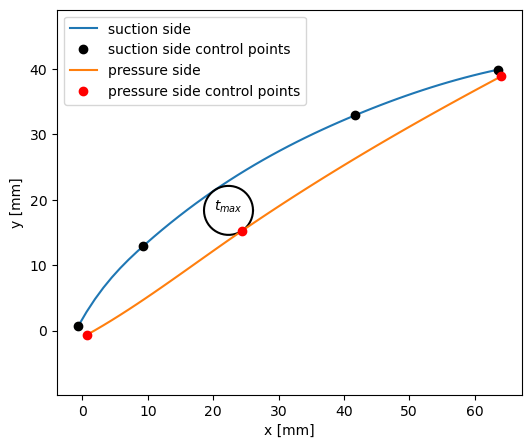

In [5]:
blade_1.plot_suction_pressure()

# 5. Attach leading Edge and Trailing Edge to Suction and Pressure Sides

In [6]:
blade_1.calculate_LE_TE()

Leading Edge is fitted successfully!
Trailing Edge is fitted successfully!


# 6. post Processing

## 6.1 Plot the Airfoil after Adding Leading Edge and Trailing Edge

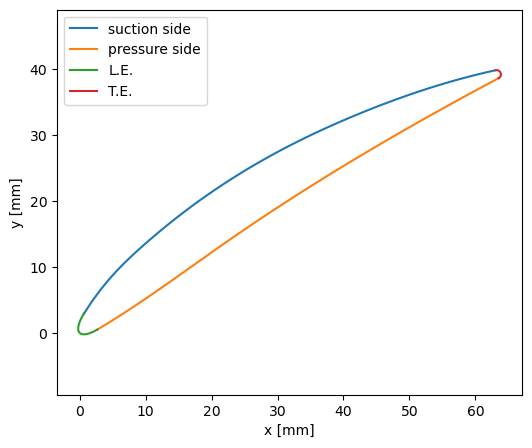

In [7]:
blade_1.plot_blade()

## 6.2 Calculate and Plot Camber and Thickness Distribution

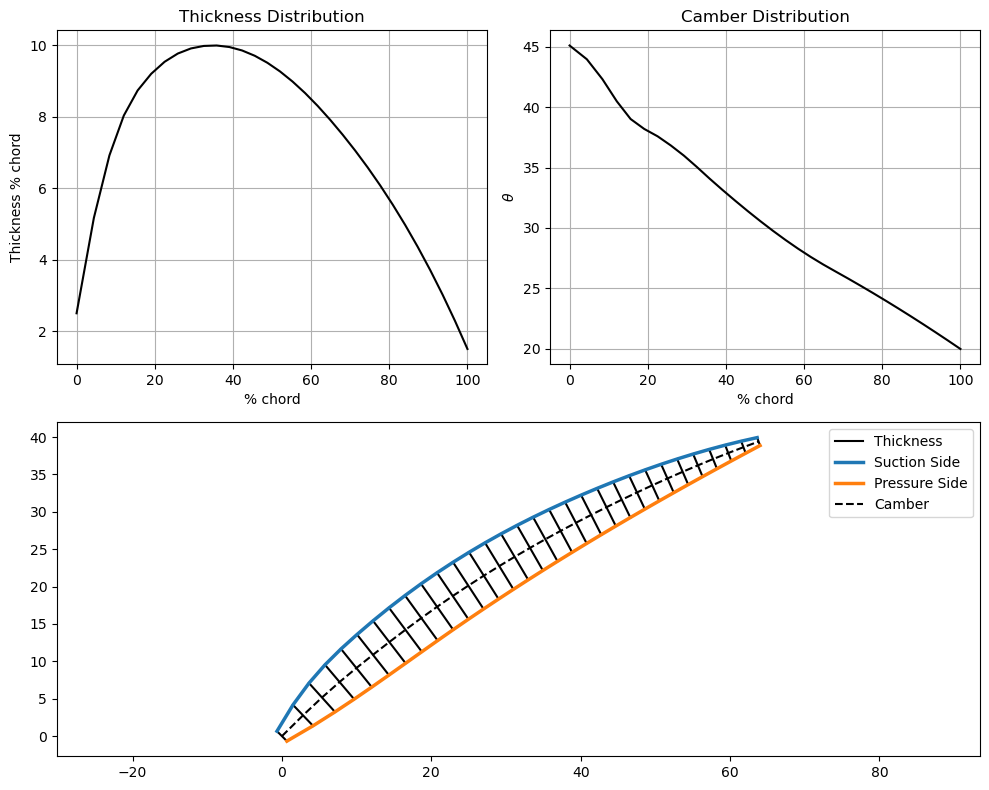

In [8]:
blade_1.calculate_camber_thick_distribution()

## 6.3 Calculate the Centroid

The centroid of the airfoil is at: (28.32, 21.199)


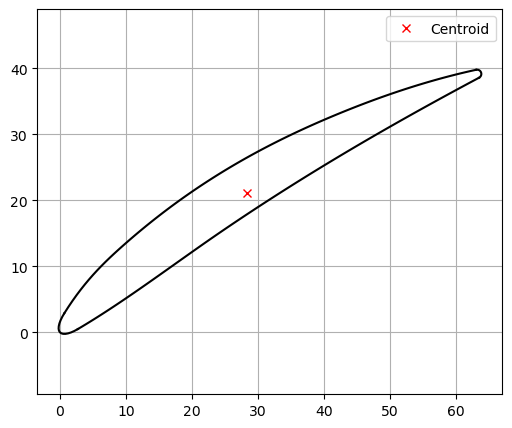

In [9]:
x_centroid, y_cetroid = blade_1.calculate_centroid()

## 6.4 Calculate the First and Second Derivative and Curvature of Suction and Pressure Sides

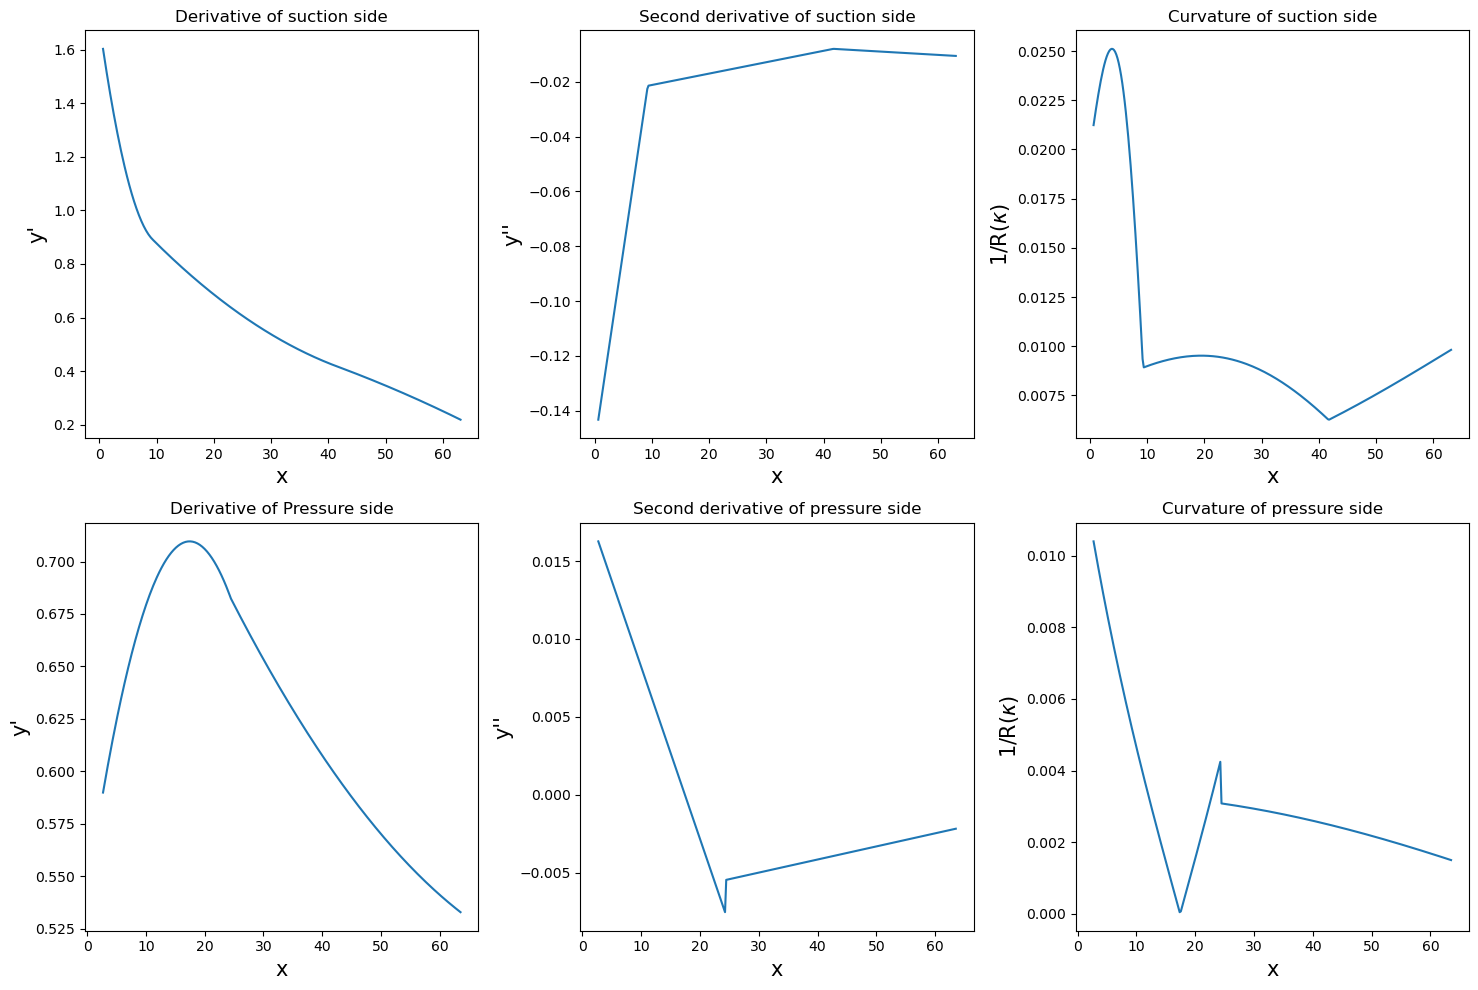

In [10]:
x_s, dy_dx_s, d2y_dx2_s, R_curv_s,x_p, dy_dx_p, d2y_dx2_p, R_curv_p = blade_1.post_process(plot=1)

# 7. Save the Parameters

In [11]:
blade_1.save_parameters("parameters.csv")

[45.         20.         75.         31.68743849 16.          8.
 10.         35.          2.5         1.5         3.          1.
  9.29       41.7        12.92       32.93        0.          0.        ]


# 8. Export Airfoil Points

In [12]:
blade_1.export_points()